In [1]:
# Fill in your name using the format below and student ID number
your_name = "van Gils, Anna Maria Hendrica"
student_id = "0842844"

In [31]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [10]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [3]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Anna Maria Hendrica, Looks good. You may continue :)


In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers 

# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [6]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = 'C:/Users/amhvg/OneDrive - TU Eindhoven/Courses/Web Information Retrieval and Data Mining/assignments/assignment-3-AnnevanGils'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [7]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [10]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [11]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

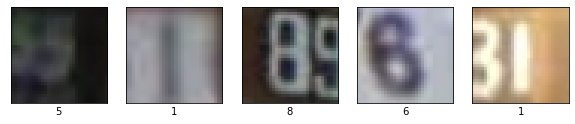

(63544, 32, 32, 3)

In [10]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)
np.array(X_train).shape

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [12]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/3
63544/63544 [==============================] - 5s 72us/sample - loss: 2.2457 - accuracy: 0.1905 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 2/3
63544/63544 [==============================] - 4s 64us/sample - loss: 2.2333 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Epoch 3/3
63544/63544 [==============================] - 4s 64us/sample - loss: 2.2332 - accuracy: 0.1910 - val_loss: 2.2331 - val_accuracy: 0.1910
Saving to file
Model stored in C:/Users/amhvg/OneDrive - TU Eindhoven/Courses/Web Information Retrieval and Data Mining/assignments/assignment-3-AnnevanGils
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)       

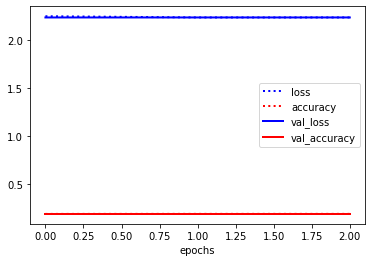

In [12]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

In [16]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

Loading model from file


## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)     

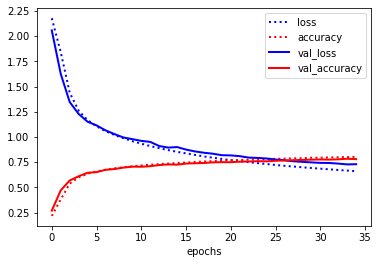

In [34]:
def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model



run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=35, batch_size=64)
answer_q_1_1 = """
               The first layer reshapes the data to 32*32*3=3072 nodes. Then 5 hidden layers with 1024 to 32 nodes, with enough starting complexity but still simplifying each layer by halving the nr. nodes. Size 32 of the last hidden layer is big enough to not oversimplify (as it did with size 16). Changing the activation of the second layer from relu to tanh increased the performance from .74 (all relu) to .78. It overfits barely. Optimizer adagrad gives less spikes in accuracy
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [14]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [15]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_68 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_69 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_70 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_72 (Dense)    

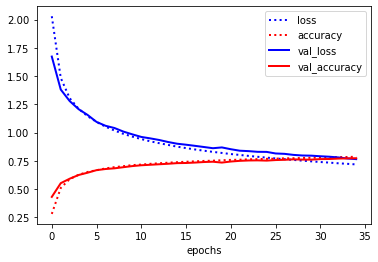

In [28]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=35, batch_size=64)
answer_q_1_2 = """
               Data is preprocessed to grayscale with rgb2gray(). This model (score .77) is not better than 1_1 (.78), but there is slightly less overfitting, so with a lot more than 35 epochs, this model might become preferred over 1_1. Both models use batch_size=64 to increase speed (adjusting of weights happens less often than with batch_size=32).
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_20 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_121 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_122 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_123 (Dense)            (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_124 (Dense)   

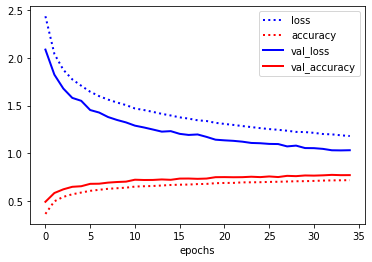

In [37]:
from tensorflow.keras import regularizers
def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(1024, activation='tanh'))
  model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=35, batch_size=64)
answer_q_1_3 = """
               Adding an l2 kernal regularizer with 0.001 to the 512 nodes layer, a BatchNormalization layer and a dropout layer makes the model underfit quite a bit, so it could go for a lot of epochs without overfitting. The rest of the model has stayed the same. However, this comes at the cost of accuracy, as here it is .77 after 35 epochs, and .78 for model 1_1.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_147 (Dense)   

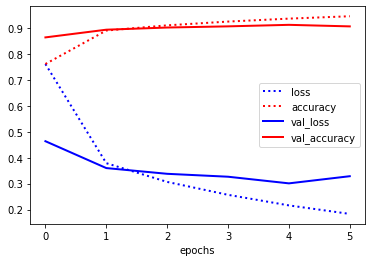

In [16]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='tanh'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, train=False, epochs=6, batch_size=64)
answer_q_2_1 = """
               The input layer has 32 filters with size 3x3. MaxPooling is added to increase the effect of the layer on the output, so that it needs less hidden layers. After each MaxPool (2x2) layer, the nr of filters is doubled to prevent the loss of input information. Padding is added for every convolutional layer to prevent additional loss of resolution. Finally the convolutional layers are flattened and a dense layer of 256 nodes is added, then the output level with 10 nodes. Batch_size is 64. The model achieves an accuracy of .91 within 6 epochs, but is overfitting already, making more epochs not very efficient anymore.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_159 (Dense)   

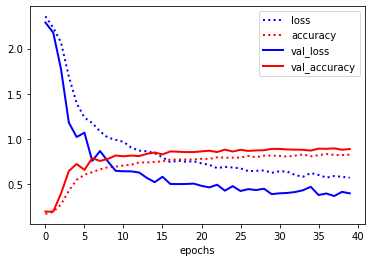

In [18]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_dir = 'C:/Users/amhvg/.openml/cache/org/openml/www/datasets/41081'
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False,
    fill_mode='nearest'
).flow(
    x=preprocessed_split[0],
    y=preprocessed_split[2],
    batch_size=64
)

augmented_split = datagen, preprocessed_split[1], preprocessed_split[3]
run_evaluation("model_2_2", build_model_2_1, data=augmented_split, base_dir=base_dir, 
               train=False, epochs=40, generator=True)
answer_q_2_2 = """
               The data generator generates some alternative versions of the preprocessed training set. Horizontal and vertical flipping is false to prevent mirroring the images (doesn't work for numbers). The model stays in underfitting range for 40 epochs, but this comes at the cost of less accuracy than model 2_1 (.89 vs. .91). This could still improve a bit with more epochs, as they won't lead to overfitting.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

19858/19858 [==============================] - 7s 348us/sample - loss: 0.3914 - accuracy: 0.8835
Answer is 378 characters long
0.883523


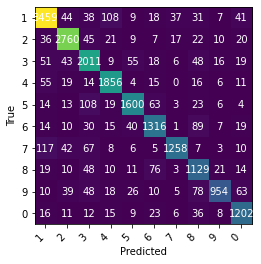

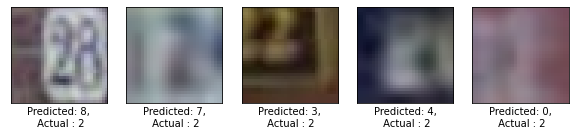

In [23]:
from sklearn.metrics import confusion_matrix

model = load_model_from_file(base_dir, "model_2_2")
test_loss, test_acc = model.evaluate(rgb2gray(X_test), y_test)
test_accuracy_3_1 = test_acc

y_pred = model.predict(rgb2gray(X_test))

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots(1,1)
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(labels, rotation=45, ha="right")
  ax.set_yticklabels(labels)
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
  
  focus_class = 1

  misclassified_samples = np.nonzero((np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1)) & (np.argmax(y_test, axis=1) == focus_class))[0]

  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
  for ax_nr, i in enumerate(misclassified_samples[:5]):
      actual_label = labels[np.argmax(y_test[i])]
      predicted_label = labels[np.argmax(y_pred[i])]
      axes[ax_nr].imshow(X_test[i])
      axes[ax_nr].set_xlabel("Predicted: {},\n Actual : {}".format(predicted_label, actual_label))
      axes[ax_nr].set_xticks(()), axes[ax_nr].set_yticks(())


answer_q_3_1 = """
               Class 1 is most often confused with 7, and the other way around, which is to be expected because of visual similarity between the numbers. The same goes for 3 and 5 which are also somewhat visually similar. Focusing on class 2, we see that 3 out of 5 examples are blurry, 1 is not aligned properly and 1 is paired with 8, which it predicts to be.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

print(test_accuracy_3_1)
plot_confusion_matrix()
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Answer is 460 characters long


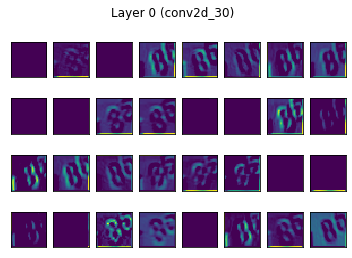

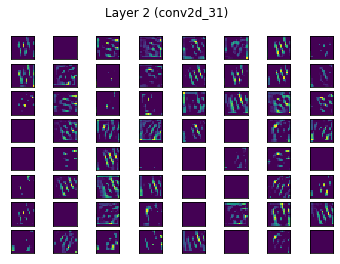

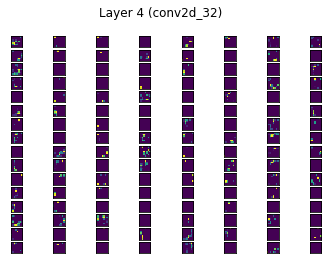

In [24]:
def plot_activations():
  model = load_model_from_file(base_dir, "model_2_2")

  img_tensor = rgb2gray(X_test)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0)

  # Extracts the outputs and names of the layers:
  layer_outputs = [layer.output for layer in model.layers]
  layer_names = [layer.name for layer in model.layers]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  # one array per layer activation
  activations = activation_model.predict(img_tensor)

  for i, layer_activation in enumerate(activations[:-3]):
    if(not("max_pool" in layer_names[i])):
      nr_filters = layer_activation.shape[3]

      nr_columns = 8
      nr_rows = nr_filters//nr_columns

      f, axes = plt.subplots(nr_rows, nr_columns, sharey=True)
      f.suptitle("Layer {} ({})".format(i, layer_names[i]))
      
      for j in np.arange(nr_filters):
        activation = layer_activation[0, :, :, j]
        axes[j // nr_columns, j % nr_columns].matshow(activation, cmap='viridis')
        axes[j // nr_columns, j % nr_columns].set_xticks([])
        axes[j // nr_columns, j % nr_columns].set_yticks([])

    # ax1.set_xticks([])
    # ax1.set_yticks([])
    # ax2.set_xticks([])
    # ax2.set_yticks([])
    # ax1.set_xlabel('Input image')
    # ax2.set_xlabel('Activation of filter {}'.format(i));


answer_q_3_2 = """
               The activations of the convolutional layers are the most interesting, so these are plotted here. Especially the activations of layer 0 seem to bring out the shape of the number more clearly. In the other two layers, the number becomes less recognizable from the low resolution, but the activations all look slightly different and are mostly not empty. This means that the model is probably learning something useful out of them.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
predicted label:  8
actual label:  8


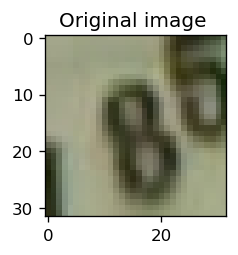

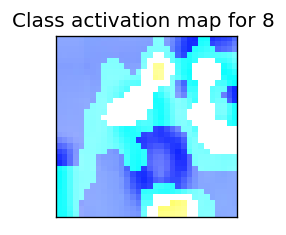

In [26]:
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import decode_predictions
import cv2

def plot_3_3():
  model = load_model_from_file(base_dir, "model_2_2")

  image_index = 0

  original_img_tensor = X_test[image_index]
  img_tensor = np.expand_dims(rgb2gray(X_test)[image_index], axis=0)

  predictions = model.predict(img_tensor)
  predicted_label = np.argmax(predictions) + 1
  print("predicted label: ", predicted_label)

  actual_label = np.argwhere(y_test[image_index])[0,0] + 1
  print("actual label: ", actual_label)
  # print("predictions: ", decode_predictions(predictions, top=3)[0])

  # Extracts the outputs and names of the layers:
  layer_outputs = [layer.output for layer in model.layers]
  layer_names = [layer.name for layer in model.layers]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  # get activations of last convolutional layer
  activations = activation_model.predict(img_tensor)
  layer_activation = activations[-4]

  class_weights = model.layers[-1].get_weights()[0]

  # class of interest is predicted label
  predicted_label_index = predicted_label - 1
  actual_label_index = actual_label - 1

  # show original image
  #######################################
  f, ax = plt.subplots(1,1, figsize=(2,2))
  f.suptitle("Original image")
  ax.imshow(original_img_tensor)
  #######################################

  nr_filters = layer_activation.shape[3]

  w, h = layer_activation[0, :, :, 0].shape
  heat_map_actual = np.zeros((w, h))
  heat_map_predicted = np.zeros((w, h))

  for i in np.arange(nr_filters):
    activation = layer_activation[0, :, :, i]
    for r, row in enumerate(activation):
      for c, value in enumerate(row):
        heat_map_predicted[r, c] += class_weights[i, predicted_label_index] * activation[r, c]
        heat_map_actual[r, c] += class_weights[i, actual_label_index] * activation[r, c]

  heat_map_predicted = np.maximum(heat_map_predicted, 0)
  heat_map_predicted = heat_map_predicted / heat_map_predicted.max()
  heat_map_actual = np.maximum(heat_map_actual, 0)
  heat_map_actual = heat_map_actual / heat_map_actual.max()


  heat_map_predicted = cv2.resize(heat_map_predicted, (original_img_tensor.shape[1], original_img_tensor.shape[0]))
  heat_map_actual = cv2.resize(heat_map_actual, (original_img_tensor.shape[1], original_img_tensor.shape[0]))

  heat_map_predicted = np.uint8(255 * heat_map_predicted)
  heat_map_actual = np.uint8(255 * heat_map_actual)

  heat_map_predicted = cv2.applyColorMap(heat_map_predicted, cv2.COLORMAP_JET)
  heat_map_actual = cv2.applyColorMap(heat_map_actual, cv2.COLORMAP_JET)
  
  superimposed_img_predicted = np.float32(heat_map_predicted) * 0.5 + np.float32(original_img_tensor)
  superimposed_img_actual = np.float32(heat_map_actual) * 0.5 + np.float32(original_img_tensor)

  img_predicted = cv2.cvtColor(superimposed_img_predicted, cv2.COLOR_BGR2RGB)
  img_actual = cv2.cvtColor(superimposed_img_actual, cv2.COLOR_BGR2RGB)

  if(actual_label == predicted_label):
    f_cam, ax_cam = plt.subplots(1,1, figsize=(2,2))
    plt.rcParams['figure.dpi'] = 120
    ax_cam.imshow(img_predicted)
    f_cam.suptitle('Class activation map for {}'.format(predicted_label))
    ax_cam.set_xticks([])
    ax_cam.set_yticks([])
  else:
    f_cam, (ax_cam_pred, ax_cam_act) = plt.subplots(1,2, figsize=(4,2.5))
    # plt.rcParams['figure.dpi'] = 120
    ax_cam_pred.imshow(img_predicted)
    ax_cam_act.imshow(img_actual)
    f_cam.suptitle('Class activation maps')
    ax_cam_pred.set_xticks([])
    ax_cam_pred.set_yticks([])
    ax_cam_act.set_xticks([])
    ax_cam_act.set_yticks([])
    ax_cam_pred.set_title("for predicted label {}".format(predicted_label), fontsize=10)
    ax_cam_act.set_title("for actual label {}".format(actual_label), fontsize=10)

  


plot_3_3()  

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)  

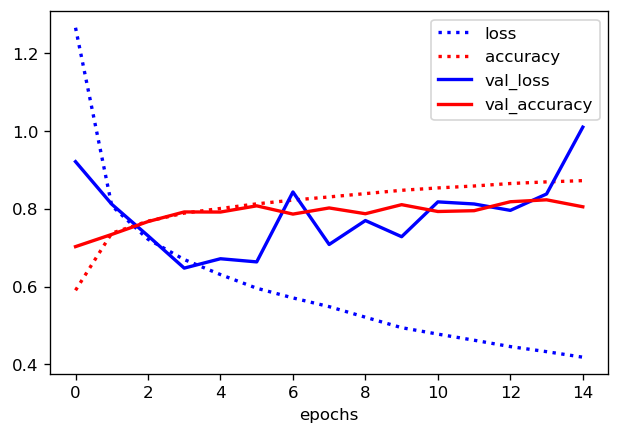

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  for layer in model_vgg16.layers[:-4]:
      layer.trainable = False

  model = model_vgg16.output
  model = layers.Flatten()(model)
  model = layers.Dense(10, activation='softmax')(model)

  model_return = models.Model(inputs=model_vgg16.inputs, outputs=model)

  # model.add(model_vgg16)
  # model.add(layers.Flatten())
  # model.add(layers.Dense(256, activation='relu'))
  # model.add(layers.Dense(10, activation='softmax'))  

  model_return.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
  
  return model_return


run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, train=False, epochs=15, batch_size=64)

answer_q_4_1 = """
               Only one dense layer of 10 nodes is added as output layer, because the question states it in singular. Freezing all layers of vgg16 model gives 0.5 score, unfreezing last 2 layers gives 0.6 score, both after 3 epochs. Finally the last 4 layers are unfrozen, yielding a score of 0.82 after 15 epochs, with batch size 64, which took a very long time to complete (over 5 hours). The accuracy is spiky and the model starts overfitting fairly early on.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [30]:
import pickle
import gzip
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
Pipeline = sklearn.pipeline.Pipeline
PowerTransformer = sklearn.preprocessing.PowerTransformer
from sklearn.multiclass import OneVsRestClassifier

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model_4_1 = load_model_from_file(base_dir, "model_4_1")

  # get output of Flatten() layer after last convolutional layer
  model_conv = models.Model(inputs=model_4_1.input, outputs=model_4_1.layers[-2].output)

  embeddings_test = model_conv.predict(X_test)
  embeddings_train = model_conv.predict(X_train)

  print(embeddings_test.shape)
  print(embeddings_train.shape)

  print("storing embeddings X_test")
  store_embedding(embeddings_test, "X_test")

  print("storing embeddings X_test")
  store_embedding(embeddings_train, "X_train")

  

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """

  numerical_pipe = Pipeline([
        ('scaling', PowerTransformer())
    ])

  # clf = RandomForestClassifier()
  clf = SVC(kernel='rbf', random_state=1)
  # clf = OneVsRestClassifier(SVC(kernel='rbf', random_state=1))

  pipeline = Pipeline([
    ('preprocess', numerical_pipe),
    ('classifier', clf)
  ])

  return pipeline


def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """

  pipeline = generate_pipeline()
  X_train_embeddings = load_embedding("X_train")
  X_test_embeddings = load_embedding("X_test")
  y_train_transformed = np.argwhere(y_train != 0)[:, 1]
  y_test_transformed = np.argwhere(y_test != 0)[:, 1]
  score = evaluate_pipeline(pipeline, X_train_embeddings, y_train_transformed, X_test_embeddings, y_test_transformed)
  print(score)

# store_embeddings()

answer_q_4_2 = """
               A new model is constructed with the output of the Flatten layer (more convenient shape than last convolutional layer, same output), which embeds the training and test data as 512-length vectors. The y data is transformed into a single integer. Then training and test data are run through a pipeline which uses PowerTransformer() to preprocess the data and then classifies using a SVC with rbf kernel. The accuracy (0.67) is not higher than achieved previously.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))
evaluation_4_2(X_train, y_train, X_test, y_test)

Pipeline: Pipeline(memory=None,
         steps=[('preprocess',
                 Pipeline(memory=None,
                          steps=[('scaling',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=True))],
                          verbose=False)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 432 characters long
0.6680934635914997
